# BlackBelt Consulting

## 1. Benson Project

### 1.1 Data Collection

In [1]:
import pandas as pd
import datetime

In [2]:
numdays = 353  # setting the number of days we want to take back 1 week from 06-29
# We want data for this year (1st semester) and the last quarter of 2018 (so we can analyze the holiday's season)

In [3]:
date_time_str = '2019-06-22 08:15:27.243860'  # penultimate date of the range in the MTA website
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')  
# transforming it to a date_time object
date_time_obj

datetime.datetime(2019, 6, 22, 8, 15, 27, 243860)

In [4]:
date_list = [date_time_obj - datetime.timedelta(days=x) for x in range(0, numdays, 7)]
# creating a list of dates that starts on the penultimate date and goes back the numdays we've set 
# (jumping 7 days each time)
date_list

[datetime.datetime(2019, 6, 22, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 15, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 8, 8, 15, 27, 243860),
 datetime.datetime(2019, 6, 1, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 25, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 18, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 11, 8, 15, 27, 243860),
 datetime.datetime(2019, 5, 4, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 27, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 20, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 13, 8, 15, 27, 243860),
 datetime.datetime(2019, 4, 6, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 30, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 16, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 9, 8, 15, 27, 243860),
 datetime.datetime(2019, 3, 2, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 23, 8, 15, 27, 243860),
 datetime.datetime(2019, 2, 16, 8, 15, 27, 243860),
 datetime.datetime

In [5]:
# transforming the dates into strings and putting in a list:

url_dates = []

for i in date_list:
    year = str(i.year).replace("20", "")
    day = str(i.day)
    if i.day < 10:
        day = "0" + day
    month = str(i.month)
    if i.month < 10:
        month = "0" + month
    date_str = year + month + day
    url_dates.append(date_str)

In [6]:
# starting the dataframe with the last available date, which is june 29, 19:
df = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_190629.txt")
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [7]:
# concatenating each new date to the original dataframe:
for url in url_dates:
    df2 = pd.read_csv(
        "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt".format(url))
    df = pd.concat([df, df2], ignore_index=True)

In [8]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
10464970,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,2761,62
10464971,TRAM2,R469,00-05-00,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,2761,62
10464972,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,13:00:00,REGULAR,5554,338
10464973,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,17:00:00,REGULAR,5554,343
10464974,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/06/2018,21:00:00,REGULAR,5554,343


In [9]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464975 entries, 0 to 10464974
Data columns (total 11 columns):
C/A                                                                     10464975 non-null object
UNIT                                                                    10464975 non-null object
SCP                                                                     10464975 non-null object
STATION                                                                 10464975 non-null object
LINENAME                                                                10464975 non-null object
DIVISION                                                                10464975 non-null object
DATE                                                                    10464975 non-null object
TIME                                                                    10464975 non-null object
DESC                                                                    10464975 non-null object
ENTRIES     

### 1.2 Data Treatment

In [10]:
# First, let's transform the date and time columns into one column as a datetime object:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10464975 entries, 0 to 10464974
Data columns (total 12 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
DATE_TIME         

In [12]:
sorted(df["DATE"].unique())

['01/01/2019',
 '01/02/2019',
 '01/03/2019',
 '01/04/2019',
 '01/05/2019',
 '01/06/2019',
 '01/07/2019',
 '01/08/2019',
 '01/09/2019',
 '01/10/2019',
 '01/11/2019',
 '01/12/2019',
 '01/13/2019',
 '01/14/2019',
 '01/15/2019',
 '01/16/2019',
 '01/17/2019',
 '01/18/2019',
 '01/19/2019',
 '01/20/2019',
 '01/21/2019',
 '01/22/2019',
 '01/23/2019',
 '01/24/2019',
 '01/25/2019',
 '01/26/2019',
 '01/27/2019',
 '01/28/2019',
 '01/29/2019',
 '01/30/2019',
 '01/31/2019',
 '02/01/2019',
 '02/02/2019',
 '02/03/2019',
 '02/04/2019',
 '02/05/2019',
 '02/06/2019',
 '02/07/2019',
 '02/08/2019',
 '02/09/2019',
 '02/10/2019',
 '02/11/2019',
 '02/12/2019',
 '02/13/2019',
 '02/14/2019',
 '02/15/2019',
 '02/16/2019',
 '02/17/2019',
 '02/18/2019',
 '02/19/2019',
 '02/20/2019',
 '02/21/2019',
 '02/22/2019',
 '02/23/2019',
 '02/24/2019',
 '02/25/2019',
 '02/26/2019',
 '02/27/2019',
 '02/28/2019',
 '03/01/2019',
 '03/02/2019',
 '03/03/2019',
 '03/04/2019',
 '03/05/2019',
 '03/06/2019',
 '03/07/2019',
 '03/08/20

In [13]:
df.columns = [column.strip() for column in df.columns]

In [14]:
df["TURNSTILE_ID"] = df["C/A"] + " " + df["UNIT"] + " " + df["SCP"] + " " + df["STATION"]

In [15]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00,A002 R051 02-00-00 59 ST
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00,A002 R051 02-00-00 59 ST
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00,A002 R051 02-00-00 59 ST
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00,A002 R051 02-00-00 59 ST
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00,A002 R051 02-00-00 59 ST


In [16]:
# Checking if there are readings that are duplicates
(df
 .groupby(["TURNSTILE_ID", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,TURNSTILE_ID,DATE_TIME,ENTRIES
82713,A011 R080 01-00-03 57 ST-7 AV,2018-12-30 15:00:00,2
281311,A035 R170 00-00-02 14 ST-UNION SQ,2019-03-27 17:00:00,2
2754557,N071 R013 00-00-02 34 ST-PENN STA,2019-02-27 19:00:00,2
2093642,JFK03 R536 00-03-04 JFK JAMAICA CT1,2019-04-07 01:00:00,2
8539468,R283 R221 00-00-00 167 ST,2019-04-15 12:00:00,2


In [17]:
# On some days, we seem to have two entries for same time.  Let's take a look at a couple of examples:
mask = ((df["TURNSTILE_ID"] == "N071 R013 00-00-00 34 ST-PENN STA") &
(df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 27).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
3530925,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,03:00:00,REGULAR,5869431,16519942,2019-02-27 03:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530926,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,07:00:00,REGULAR,5869444,16520153,2019-02-27 07:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530927,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,11:00:00,REGULAR,5869635,16521165,2019-02-27 11:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530928,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,15:00:00,REGULAR,5869852,16521721,2019-02-27 15:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530929,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,REGULAR,2196639,2588468,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530930,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,19:00:00,RECOVR AUD,5870225,16522419,2019-02-27 19:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530931,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,REGULAR,2196693,2588648,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA
3530932,N071,R013,00-00-00,34 ST-PENN STA,ACE,IND,02/27/2019,23:00:00,RECOVR AUD,5870426,16522677,2019-02-27 23:00:00,N071 R013 00-00-00 34 ST-PENN STA


On this case, the RECOVR AUD seems to be the correct one since the entries and exits values are similar to the other readings.

In [18]:
# Other example:
mask = ((df["TURNSTILE_ID"] == "R205A R014 04-02-01 FULTON ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2018, 10, 21).date()))

df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,TURNSTILE_ID
7253466,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,REGULAR,2244820,489731,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253467,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,01:00:00,RECOVR AUD,2244820,10647811,2018-10-21 01:00:00,R205A R014 04-02-01 FULTON ST
7253468,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,05:00:00,REGULAR,2244820,489731,2018-10-21 05:00:00,R205A R014 04-02-01 FULTON ST
7253469,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,09:00:00,REGULAR,2244820,489731,2018-10-21 09:00:00,R205A R014 04-02-01 FULTON ST
7253470,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,13:00:00,REGULAR,2244820,489731,2018-10-21 13:00:00,R205A R014 04-02-01 FULTON ST
7253471,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,17:00:00,REGULAR,2244820,489731,2018-10-21 17:00:00,R205A R014 04-02-01 FULTON ST
7253472,R205A,R014,04-02-01,FULTON ST,2345ACJZ,IRT,10/21/2018,21:00:00,REGULAR,2244820,489731,2018-10-21 21:00:00,R205A R014 04-02-01 FULTON ST


On the other hand, in this case, the RECOVR AUD seems to be the wrong one (exits are much larger than the regular exits).

In [19]:
# Since we can't map every one of these ocurrencies, we will remove all the duplicates and try to deal with the 
# aparent register errors in another way later:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [20]:
# No duplicate problems anymore:
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-06-30 00:00:00,1
6976536,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 06:00:00,1
6976529,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 02:00:00,1
6976530,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 06:00:00,1
6976531,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 10:00:00,1
6976532,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 14:00:00,1
6976533,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 18:00:00,1
6976534,R142,R293,01-00-00,34 ST-PENN STA,2018-07-13 22:00:00,1
6976535,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 02:00:00,1
6976537,R142,R293,01-00-00,34 ST-PENN STA,2018-07-14 10:00:00,1


In [21]:
df.describe()

,ENTRIES,EXITS
count,1.046480e+07,1.046480e+07
mean,4.033497e+07,3.319718e+07
std,2.077426e+08,1.923960e+08
min,0.000000e+00,0.000000e+00
25%,4.492890e+05,1.896340e+05
50%,2.356565e+06,1.348066e+06
75%,6.869352e+06,4.747031e+06
max,2.144893e+09,2.146093e+09


For our data we are aiming only in the entries since we believe this is a better approach to gauge the number of people that may be focusing on the ads. 

We can see from the table above that the average of cumulative exits is much lower than the entries. This probably happens because many people don't use the turnstiles to exit a station.

Also, people entering the stations are more likely to spend more time inside it than people exiting the station (waiting for the subway to arrive) and therefore, more chances to see the digital banners.

In [22]:
# Conclusion: Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [23]:
df.reset_index(drop=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
0,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,21:00:00,5554,2019-06-28 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
1,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,17:00:00,5554,2019-06-28 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
2,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,13:00:00,5554,2019-06-28 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
3,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,09:00:00,5554,2019-06-28 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
4,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,05:00:00,5554,2019-06-28 05:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
5,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/28/2019,01:00:00,5554,2019-06-28 01:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
6,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,21:00:00,5554,2019-06-27 21:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
7,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,17:00:00,5554,2019-06-27 17:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
8,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,13:00:00,5554,2019-06-27 13:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT
9,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/27/2019,09:00:00,5554,2019-06-27 09:00:00,TRAM2 R469 00-05-01 RIT-ROOSEVELT


In [24]:
# There seems to be a problem with 23rd st station (and others) because different stations are named the same way:
df[df["STATION"] == "23 ST"].groupby(["LINENAME"]).mean()

,ENTRIES
LINENAME,
1,5.319540e+06
6,1.120533e+08
CE,2.071969e+07
FM,2.564156e+08
NRW,1.124437e+07


Let's try to solve this by changing only the name of the most important problematic stations (the ones that probably have a high foot traffic and may mess up our results) into "station + line".

We'll do this for:
- 23 st
- 86 st
- 96 st
- 14 st
- 125 st
- Chambers St
- 50 st
- Canal St
- 28 St
- 72 St

In [25]:
# Let's create a new dataframe with only the problematic stations and remove them from the original df.
prob = ((df["STATION"] == '14 ST') |
(df["STATION"] == '23 ST') | 
(df["STATION"] == '86 ST') |
(df["STATION"] == '96 ST') |
(df["STATION"] == 'CANAL ST') |
(df["STATION"] == 'CHAMBERS ST') |
(df["STATION"] == '50 ST') |
(df["STATION"] == '28 ST') |
(df["STATION"] == '72 ST') |
(df["STATION"] == '125 ST'))
df_prob = df[prob]

In [26]:
df.drop(df[prob].index, inplace=True)
sorted(df["STATION"].unique())

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '39 AV',
 '4 AV-9 ST',
 '40 ST LOWERY ST',
 '42 ST-BRYANT PK',
 '42 ST-PORT AUTH',
 '45 ST',
 '46 ST',
 '46 ST BLISS ST',
 '47-50 STS ROCK',
 '49 ST',
 '4AV-9 ST',
 '5 AV/53 ST',
 '5 AV/59 ST',
 '5 AVE',
 '51 ST

In [27]:
# For this new df, let's change the STATION to STATION + LINENAME:

df_prob["STATION"] = df_prob["STATION"] + " " + df_prob["LINENAME"]
df_prob.head()

/Users/liviasalgueiro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,TURNSTILE_ID
171875,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,21:00:00,245172960,2019-06-28 21:00:00,R305 R206 01-00-02 125 ST
171874,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,17:00:00,245172563,2019-06-28 17:00:00,R305 R206 01-00-02 125 ST
171873,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,13:00:00,245172050,2019-06-28 13:00:00,R305 R206 01-00-02 125 ST
171872,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,09:00:00,245171827,2019-06-28 09:00:00,R305 R206 01-00-02 125 ST
171871,R305,R206,01-00-02,125 ST 23,23,IRT,06/28/2019,05:00:00,245171667,2019-06-28 05:00:00,R305 R206 01-00-02 125 ST


In [28]:
# Now, let's concatenate this modified df into our original df to bring these stations back:
df = pd.concat([df, df_prob], ignore_index=True)

In [29]:
sorted(df["STATION"].unique())

['1 AV',
 '103 ST',
 '103 ST-CORONA',
 '104 ST',
 '110 ST',
 '111 ST',
 '116 ST',
 '116 ST-COLUMBIA',
 '121 ST',
 '125 ST 1',
 '125 ST 23',
 '125 ST 456',
 '125 ST ACBD',
 '135 ST',
 '137 ST CITY COL',
 '138/GRAND CONC',
 '14 ST 123FLM',
 '14 ST ACEL',
 '14 ST FLM123',
 '14 ST-UNION SQ',
 '145 ST',
 '149/GRAND CONC',
 '14TH STREET',
 '15 ST-PROSPECT',
 '155 ST',
 '157 ST',
 '161/YANKEE STAD',
 '163 ST-AMSTERDM',
 '167 ST',
 '168 ST',
 '169 ST',
 '170 ST',
 '174 ST',
 '174-175 STS',
 '175 ST',
 '176 ST',
 '18 AV',
 '18 ST',
 '181 ST',
 '182-183 STS',
 '183 ST',
 '190 ST',
 '191 ST',
 '2 AV',
 '20 AV',
 '207 ST',
 '21 ST',
 '21 ST-QNSBRIDGE',
 '215 ST',
 '219 ST',
 '225 ST',
 '23 ST 1',
 '23 ST 6',
 '23 ST CE',
 '23 ST FM',
 '23 ST NRW',
 '231 ST',
 '233 ST',
 '238 ST',
 '25 AV',
 '25 ST',
 '28 ST 1',
 '28 ST 6',
 '28 ST NRW',
 '3 AV',
 '3 AV 138 ST',
 '3 AV-149 ST',
 '30 AV',
 '33 ST',
 '33 ST-RAWSON ST',
 '34 ST-HERALD SQ',
 '34 ST-HUDSON YD',
 '34 ST-PENN STA',
 '36 AV',
 '36 ST',
 '3

Now, let's try to calculate the number of real entries in each period of time, since the original data only shows the cumulative entries registered up to that time:


In [30]:
df = df.groupby(["STATION","TURNSTILE_ID", "LINENAME", "DATE", "TIME", "DATE_TIME"],as_index=False).ENTRIES.sum()

In [31]:
df[["PREV_DATETIME", "PREV_ENTRIES"]] = (df
                                                       .groupby(["STATION", "TURNSTILE_ID", "LINENAME"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))  

In [32]:
df.head(10)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES
0,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,03:00:00,2019-01-01 03:00:00,14276525,NaT,NaN
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0
6,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,03:00:00,2019-01-02 03:00:00,14278032,2019-01-01 23:00:00,14277982.0
7,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,07:00:00,2019-01-02 07:00:00,14278106,2019-01-02 03:00:00,14278032.0
8,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,11:00:00,2019-01-02 11:00:00,14279160,2019-01-02 07:00:00,14278106.0
9,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,15:00:00,2019-01-02 15:00:00,14279791,2019-01-02 11:00:00,14279160.0


In [33]:
# Drop the rows for the earliest date_time in the df
df.dropna(subset=["PREV_DATETIME"], axis=0, inplace=True)

Another issue we found was the fact that the entries counters usually count up, eventually hit some number, and reset to 0. Also, sometimes they also count down as a reverse counter. To solve this, let's use the following function:


In [34]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 10k, then the counter might have been reset.
# 10k seems to be a reasonable number for maximum people entering in a period of hours.
# Just set it to zero as different counters have different cycle limits
df["REAL_ENTRIES"] = df.apply(get_daily_counts, axis=1, max_counter=10000)

13691679 14803646.0
59016696 60365873.0
370386823 370681694.0
2233408 2466148.0
6043643 6409687.0
211722 281044.0
2554135 2742207.0
190088 615955.0
954734234 955485322.0
146 1629651041.0
1628896228 407880.0
13477639 14214275.0
10310850 10830830.0
4748249 5017089.0
1183527 2099247.0
12788603 13465087.0
15736351 16478555.0
7929140 8347850.0
12072605 12628457.0
10838781 11516264.0
36036748 36977530.0
3598453 4424276.0
14011358 14802694.0
166413 664186.0
1408885 1894570.0
2097089095 8585853.0
25412483 2097051492.0
8221910 25517307.0
15070839 15661511.0
13864557 14403309.0
1805805 2364921.0
579796 1305489.0
4594340 5793308.0
11614538 12647834.0
10437179 11220187.0
3621468 4050060.0
4163063 4644952.0
5959006 6125521.0
1121212715 1121305577.0
2025970408 2025875710.0
4389057 4651612.0
48963 248929.0
582452 717006.0
2955233 3075490.0
11234 5605753.0
5599832 13162.0
1681230707 1681141487.0
4351752 4711600.0
5108365 5452810.0
5162835 5489956.0
2794765 3620813.0
4149302 4921823.0
13317143 14017816

12190738 15466827.0
15468462 12191276.0
14858890 15612666.0
323 13588976.0
11 51318.0
1511587 145259.0
147164 1511900.0
13032069 327464.0
476 131396.0
131074 550.0
52562893 53159951.0
2255724 2611457.0
2081420 2432349.0
6060266 1057513.0
459365 6301055.0
2642613 3054117.0
30991 324988.0
1911439 2156025.0
1875973 2165011.0
4678101 5231799.0
458754 5067.0
4615 458835.0
230580 361365.0
799576 1191847.0
2176836 2738673.0
10478937 11104035.0
21915345 22355016.0
22081125 22620069.0
18865899 19397181.0
2834561 3072296.0
2762084 2936313.0
128589 235818.0
1398606 1460209.0
58482 150253.0
1470073 1578967.0
637270 679723.0
1643366 1681049.0
673034 784065.0
487027 554377.0
1570781 108204.0
30 1580082.0
4072456 4534331.0
1407006 1704332.0
7034227 7305802.0
2708058 3037094.0
359275 679515.0
304682 649178.0
157050 575607.0
134582410 476783.0
401842 134624581.0
201760021 201884403.0
4596811 5066376.0
6637943 6949273.0
3532137 3897046.0
50349452 198446.0
2742391 50514827.0
704657293 2786140.0
22 704675

5185516 14630916.0
14631708 5185516.0
5196016 14655214.0
14656605 5196016.0
14111319 14916916.0
84779326 85055931.0
1243305 1504020.0
8848396 9442445.0
6792703 7408125.0
8668223 9163154.0
1416891 1785014.0
86033 286545.0
3749848 3920930.0
57600328 57969609.0
11489000 12046184.0
2726993 3398166.0
1042290646 1043117439.0
1054964 740277.0
410 1635517.0
6065785 7084648.0
14510645 15539266.0
3433202 4356171.0
842992 913336.0
976237 1537390.0
39191 418557.0
1217286 1551482.0
101840 384410.0
5876302 6365354.0
4099653 4921700.0
1256650 2315715.0
26684334 28065181.0
1256508651 1254958900.0
9431426 1058340.0
44 9652856.0
579 112648.0
12 286376.0
7178 552543411.0
552542449 7738.0
6718661 473002.0
473020 6718661.0
6749425 473529.0
473562 6749425.0
462344 479280.0
15167158 2301300.0
2301368 15167158.0
15198190 2302645.0
2302715 15198190.0
2274946 2315452.0
4022941 1908426.0
1908578 4022941.0
4050583 1910943.0
1911046 4050583.0
1855109 1934813.0
3611912 74393.0
72 3693753.0
891097 495016.0
495038 89

5286794 5886927.0
2539922 3004096.0
6580147 6890957.0
1337756 1571123.0
11909941 12586452.0
124033 710927.0
3384851 3920524.0
8346198 8796098.0
6829331 7224354.0
5769941 6105288.0
3331017 3794613.0
5071891 5603000.0
14056577 14840442.0
1263099 1318975.0
16 268334.0
67135923 11052.0
262159 67148734.0
10847115 11263477.0
914785 1178339.0
4389491 4564482.0
556244 654135.0
5262505 239634.0
23 5412842.0
2186293 2428094.0
7056086 7360264.0
2621697 3177582.0
72513 124974.0
2596536 2699458.0
941715 1170028.0
13493716 14056538.0
13339307 14043763.0
1342616 1750164.0
7431499 7865513.0
2086872 2519819.0
5600440 6062293.0
2464242 2924498.0
2591926 3063873.0
5855715 6238253.0
825729 971161.0
1609227 1871282.0
1621919 1828307.0
5580075 5650875.0
5855479 145100.0
0 5877814.0
744788 941015.0
5211217 5420157.0
11951493 12421524.0
1315330 1656105.0
4657061 5011722.0
3312104 3883453.0
4514046 5135783.0
3412550 3924889.0
4596122 5085186.0
5813666 6194933.0
2683957 3005526.0
7385760 7683809.0
8760549 91680

10141092 10705493.0
11488547 12097564.0
2506115 3126266.0
690651060 690048800.0
10 7603756.0
6911027 102566.0
16822643 608882.0
134 16835516.0
73 456182.0
19589852 20843270.0
17351962 18548791.0
3207738 3637279.0
8351809 8595952.0
9312160 9505538.0
28 222451.0
25 301490.0
23 281294.0
21 184087.0
914466 1588084.0
914168 1567304.0
725473 1270477.0
616151 1072535.0
582329 1008475.0
845184 1397066.0
1324913 2246511.0
2163008 3687521.0
160315 291367.0
263230 460416.0
375538 653603.0
450655 811258.0
770946 1331890.0
768098 1520156.0
240073 1453163.0
4113391 4265606.0
2483262 2753898.0
7689748 8280698.0
164209 188305.0
2354977 2369617.0
3401299 3423650.0
67393513 67627953.0
499958 525849.0
103486086 103703894.0
515459 732719.0
458876 665493.0
297398758 297493232.0
600142 243100.0
160 663801.0
4060097 4230075.0
671855 801715.0
947048 1072256.0
5714313 5953767.0
7927849 8515342.0
6564706 6902314.0
5747899 6022291.0
9254110 9745138.0
2134986 2440250.0
6928534 7252416.0
728117 994606.0
578073 753

490778 662505.0
202220 638367.0
413440 402603.0
4835861 4976478.0
2973160 3056724.0
4858055 5044057.0
134247058 134329537.0
5208425 5683431.0
5458781 5636330.0
2921978 3058361.0
819 1522416.0
1095902 154735.0
425 7744652.0
7222912 168390.0
137 3191017.0
2691729 167173.0
8104923 8581996.0
7785520 18099790.0
18099882 7785520.0
17789669 18274135.0
5517690 6026516.0
8235388 8649711.0
738110 928142.0
1500961 1756312.0
326 3756473.0
3312407 85749.0
516079 579408.0
1595792 1791918.0
8 2021820.0
1714416 40887.0
3127516 3599442.0
393216 0.0
0 393216.0
50331648 0.0
0 50331648.0
1928603561 409.0
367 1928603554.0
655711 3263006.0
131182 737713.0
2972075 200542.0
2321619 2695248.0
7347786 7722647.0
827628 1038345.0
3624817 3862538.0
524298 5853002.0
393384915 393169694.0
775999015 775271735.0
863124 2044480.0
13869109 14622062.0
2229666 2687534.0
7821291 8128449.0
10564471 10921093.0
1892853 2459873.0
1680333 1777991.0
2270992 2349455.0
2171890 2306800.0
2834478 3079121.0
7766119 8007465.0
6391360 

0 126782.0
39 194814.0
42 19188.0
1005421 1303172.0
3275149 3489055.0
101150 370466.0
11952604 12627821.0
4 14176715.0
13657689 333845.0
0 13480116.0
0 71826.0
13001908 237415.0
1122 8296931.0
7737713 241828.0
605331 764783.0
2453869 2655783.0
1118046 1438778.0
1824419 2368492.0
2543366 2915531.0
2144892848 2590604.0
2591086 2144892848.0
10653626 11306527.0
244 438498743.0
438132669 204275.0
303094340 303385220.0
303164093 303131148.0
303131481 303164093.0
303165663 303132595.0
303132965 303165631.0
3631479 4301281.0
3731441 3698321.0
3699277 3731441.0
51683283 51950382.0
51748392 51715351.0
51715741 51748392.0
259 7083643.0
6738458 251106.0
11120414 11568487.0
2115520532 2115868117.0
104969 386990.0
1726779 2134214.0
7516241 8261558.0
3371367 3765506.0
3125678 3415849.0
9331608 9636629.0
11387695 11854854.0
7557428 8233467.0
12522962 13687676.0
1158288574 1158732051.0
256270 567012.0
7400476 7670101.0
6306564 6558534.0
5710434 6036235.0
12757481 13240647.0
117873917 118042065.0
119713

9384829 9813738.0
1471431 1592059.0
6281259 6584894.0
2902022 3345345.0
539333121 539679594.0
1560087590 1559961242.0
2617805 2954601.0
7096298 7558359.0
170 374903.0
247279 57616.0
6 1488298.0
1338175 5523.0
7622665 7813554.0
4264831 4415218.0
3962887 4316647.0
738444 1117852.0
1036830 1610113.0
4934304 5625390.0
894979 980753.0
3218416 3257952.0
2750116 2625193.0
2135225 2755488.0
19526502 19967275.0
981 448729.0
22935 50929.0
52 333007.0
282291 9288.0
5931045 1625250504.0
1625620181 6221453.0
571803 1241922493.0
1241776259 750156.0
150 123697.0
39 3912187.0
6259200 51639.0
3759416 6551896.0
3390827 300278556.0
300220487 3863329.0
407351 864059.0
5249787 5828339.0
12 1029102.0
924861 218640.0
230 8945551.0
8529255 102662.0
7711516 8298734.0
1507929 2320044.0
1 458752.0
458752 1.0
27 1048102.0
832580 7104.0
890763 875194.0
875271 890763.0
33 565649.0
145544 22637.0
807 608323.0
169088 26034.0
760 1252507.0
809497 25517.0
32 1573067.0
1267395 21939.0
27 152245.0
386910 17829.0
2 419044

945613 2186553.0
4562175 5355366.0
431079 970414.0
1609 733077.0
957828 1539097.0
6735928 7174483.0
29 6333363.0
6093109 54480.0
11 5651802.0
5460565 98840.0
3461875 3812809.0
8336033 8922029.0
14423001 15425628.0
6951691 8311561.0
36750354 38569365.0
502052452 629454.0
1016 501616113.0
4993624 5944711.0
12775105 13535671.0
1144 790332.0
364828 121682.0
334332 665741.0
3161740 3538278.0
91348 517031.0
4130391 4592682.0
5339002 5686904.0
3633688 2362489.0
2099984 3754496.0
393030 3633682.0
3348753 456279.0
26 392982.0
228941 28516.0
35 792033.0
641849 31391.0
5364 201093.0
201262 5364.0
130 355689.0
334140 23331.0
0 371411.0
30655 0.0
145 30655.0
292759 92075.0
92092 292759.0
0 96138.0
38 61933.0
2 23944.0
480359 2473.0
0 493551.0
63 10491.0
0 30337.0
1 23976.0
121573 7106.0
37 122459.0
71 21410.0
0 25013.0
228 63257.0
86 31186.0
67321 10627.0
0 151444.0
0 50107.0
13 101835.0
1480118 15680.0
0 1569692.0
8 796924.0
410184 24519.0
13 222491.0
239818 75358.0
75436 239818.0
144 1524744.0
83

0 102143.0
70 108677.0
218130 30441.0
47 418083.0
53 28469.0
78 24699.0
0 69518.0
170 79254.0
108 36410.0
7215 28483.0
2 15994.0
17 116111.0
310 77047.0
27 421094.0
120740 19589.0
25 254891.0
161 263468.0
84594 12624.0
70 261877.0
137201 8383.0
0 248439.0
187450 4706.0
1 84389.0
64708 1596.0
2 18461.0
5 45270.0
21538 6501.0
52 50874.0
12720739 13254800.0
7745948 8453543.0
269 416204.0
435024 190304.0
262 540996.0
6041962 6959314.0
1159313 2399137.0
10762102 11635771.0
7889573 8568624.0
2908449 3342988.0
4632195 5252337.0
1351217 1498000.0
4568685 4805121.0
3787956 3969380.0
5559562 5723259.0
83738 178973.0
14382771 15178055.0
11595408 12042182.0
6185071 6447894.0
4770825 4983842.0
6159637 6437072.0
5466770 5703050.0
3443020 3964472.0
4996927 5224977.0
458752 338700.0
319237 469055.0
1160585 1423045.0
7221096 7716581.0
10409575 10802662.0
1750105 2031586.0
10973412 11312376.0
8417669 8614700.0
309678 1377311.0
3046388 3875084.0
3603587 4572987.0
0 419446441.0
419446441 0.0
755245946 755

146 402230.0
0 22392.0
73261 8255.0
263 104356.0
187487 6589.0
218300 207563.0
11307 218300.0
207647 11307.0
1 216931.0
34149 12220.0
3 259868.0
115733 7443.0
36 92432.0
2 225611.0
71391 11876.0
0 73001.0
189 208597.0
2 18021.0
14487 559.0
82899 170403.0
242046 82899.0
195799 242046.0
242148 195799.0
82998 242148.0
242185 82998.0
83013 242185.0
3 79644.0
90444 7827.0
0 97281.0
1 199341.0
96847 9253.0
1 55497.0
40522 6999.0
280 41680.0
1 195297.0
97130 9108.0
1 92340.0
85121 158037.0
158181 85121.0
16 161839.0
104505 4423.0
311438 108091.0
108095 311438.0
116 113433.0
114 30631.0
70 535418.0
418261 10826.0
30 108599.0
18162 7028.0
71 91636.0
51 208066.0
106200 7743.0
83 339494.0
170049 16030.0
50 43178.0
306831 7278.0
0 328073.0
1 102181.0
129301 12205.0
12 129843.0
12 268050.0
178317 8084.0
0 172169.0
14 32363.0
132295 7175.0
21 88000.0
3 60779.0
57703 2699.0
258 71753.0
258946 58198.0
96951 258946.0
1 37594.0
18412 927.0
2 41154.0
18636 1896.0
0 17562.0
1 69873.0
42189 1920.0
0 20940.

614909 852515.0
458762 1305915.0
1254299 465995.0
1234753 2780799.0
16879398 18024553.0
644193 1621263.0
4999212 5763859.0
114921 634715.0
1173137 1389382.0
5045735 5465857.0
5190881 5599987.0
6456136 6861799.0
8970952 9600646.0
5157234 5392119.0
116781 237626.0
1759818 1868849.0
3550354 3750993.0
3749919 4302702.0
596436 892704.0
1004919 1120218.0
2169579 2233867.0
117658918 117715589.0
3127012 3244111.0
4386452 4644115.0
1871162 2132067.0
359275 874709.0
2758146 283164.0
14 3012470.0
5 21436.0
15680 1030.0
10242467 446942.0
678 10301231.0
6931787 7634557.0
458782 555845.0
67194097 463759.0
524349 67197948.0
458763 16733.0
117562070 469258.0
31 117563815.0
158056 448448.0
10 159840.0
90494 47579.0
159011 111624.0
7 199726.0
199977 7.0
239162 226887.0
216194 354852.0
339032 282688.0
427652 367301.0
302 427652.0
92632 77088.0
1871318 122977.0
1925013 1900014.0
103 1935410.0
21830 796.0
159 34128.0
4091629 232234.0
4287597 4257512.0
132 4323543.0
2614020 3095980.0
2818085 2785945.0
58079

16605221 17268014.0
2055884 2711149.0
7447994 8186611.0
2454533 1826273.0
10 2479313.0
1114281 6565.0
8001602 8492808.0
614895 1502064.0
7869913 8585439.0
4502810 5771579.0
20158005 582028.0
348 20220123.0
1008228 1618536.0
290606 805664.0
13159580 13554688.0
416961 910759.0
21064744 21823867.0
11306201 12659502.0
19780961 21761374.0
4295103 4350314.0
2991478 3110913.0
3288191 3444543.0
909238 1145031.0
713172 890379.0
544433 642574.0
6703891 7139134.0
4497181 4739987.0
3042113 3259273.0
2530037 2795433.0
3398580 3763481.0
4201616 4443844.0
10407421 10859867.0
5062583 5473336.0
8023548 8334584.0
3679665 3915275.0
5110775 5377314.0
1027 5144420.0
11 100831.0
4882332 80437.0
5226920 5788160.0
1433955 2010593.0
10334153 10767059.0
6642002 6907349.0
5205973 5425019.0
7722049 8013391.0
12323337 12801143.0
5483644 5810949.0
7746155 8166669.0
1286097 1721018.0
554344 785344.0
29450 99091.0
0 143380.0
6892132 6961921.0
701663 741654.0
2482058 181295.0
273 2628162.0
799651 1369465.0
2068499 249

In [36]:
df.head()

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0


In [35]:
df[df["STATION"] == "GRD CNTRL-42 ST"].sort_values(by=["REAL_ENTRIES"],ascending=False)

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES
6953085,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,1690214,2019-06-18 16:00:00,1686251.0,3963.0
6948434,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,2544354,2019-05-16 16:00:00,2540408.0,3946.0
6952848,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,1450391,2019-05-13 16:00:00,1446527.0,3864.0
6948405,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,2522656,2019-05-14 16:00:00,2518795.0,3861.0
6955139,GRD CNTRL-42 ST,R238A R046 02-03-02 GRD CNTRL-42 ST,4567S,05/16/2019,20:00:00,2019-05-16 20:00:00,1964402,2019-05-16 16:00:00,1960548.0,3854.0
6952854,GRD CNTRL-42 ST,R238A R046 02-03-01 GRD CNTRL-42 ST,4567S,05/14/2019,20:00:00,2019-05-14 20:00:00,1461256,2019-05-14 16:00:00,1457476.0,3780.0
6948636,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,06/18/2019,20:00:00,2019-06-18 20:00:00,2801644,2019-06-18 16:00:00,2797883.0,3761.0
6948399,GRD CNTRL-42 ST,R238A R046 02-00-04 GRD CNTRL-42 ST,4567S,05/13/2019,20:00:00,2019-05-13 20:00:00,2511662,2019-05-13 16:00:00,2507985.0,3677.0
6950664,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/21/2019,20:00:00,2019-05-21 20:00:00,654412924,2019-05-21 16:00:00,654409320.0,3604.0
6950668,GRD CNTRL-42 ST,R238A R046 02-03-00 GRD CNTRL-42 ST,4567S,05/22/2019,12:00:00,2019-05-22 12:00:00,654418954,2019-05-22 08:00:00,654415384.0,3570.0


In [36]:
df["WEEKDAY"] = df["DATE_TIME"].dt.weekday_name
df.head()

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES,WEEKDAY
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0,Tuesday
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0,Tuesday
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0,Tuesday
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0,Tuesday
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0,Tuesday


In [37]:
df = df.assign(SESSION=pd.cut(df.DATE_TIME.dt.hour,[-1,5,11,17,23],labels=['Dawn','Morning','Afternoon','Evening']))
df

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES,WEEKDAY,SESSION
1,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,07:00:00,2019-01-01 07:00:00,14276565,2019-01-01 03:00:00,14276525.0,40.0,Tuesday,Morning
2,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,11:00:00,2019-01-01 11:00:00,14276733,2019-01-01 07:00:00,14276565.0,168.0,Tuesday,Morning
3,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,15:00:00,2019-01-01 15:00:00,14277178,2019-01-01 11:00:00,14276733.0,445.0,Tuesday,Afternoon
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0,Tuesday,Evening
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0,Tuesday,Evening
6,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,03:00:00,2019-01-02 03:00:00,14278032,2019-01-01 23:00:00,14277982.0,50.0,Wednesday,Dawn
7,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,07:00:00,2019-01-02 07:00:00,14278106,2019-01-02 03:00:00,14278032.0,74.0,Wednesday,Morning
8,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,11:00:00,2019-01-02 11:00:00,14279160,2019-01-02 07:00:00,14278106.0,1054.0,Wednesday,Morning
9,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,15:00:00,2019-01-02 15:00:00,14279791,2019-01-02 11:00:00,14279160.0,631.0,Wednesday,Afternoon
10,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,19:00:00,2019-01-02 19:00:00,14280986,2019-01-02 15:00:00,14279791.0,1195.0,Wednesday,Evening


In [38]:
df[df["SESSION"] == "Evening"]

,STATION,TURNSTILE_ID,LINENAME,DATE,TIME,DATE_TIME,ENTRIES,PREV_DATETIME,PREV_ENTRIES,REAL_ENTRIES,WEEKDAY,SESSION
4,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,19:00:00,2019-01-01 19:00:00,14277679,2019-01-01 15:00:00,14277178.0,501.0,Tuesday,Evening
5,1 AV,H007 R248 00-00-00 1 AV,L,01/01/2019,23:00:00,2019-01-01 23:00:00,14277982,2019-01-01 19:00:00,14277679.0,303.0,Tuesday,Evening
10,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,19:00:00,2019-01-02 19:00:00,14280986,2019-01-02 15:00:00,14279791.0,1195.0,Wednesday,Evening
11,1 AV,H007 R248 00-00-00 1 AV,L,01/02/2019,23:00:00,2019-01-02 23:00:00,14281488,2019-01-02 19:00:00,14280986.0,502.0,Wednesday,Evening
16,1 AV,H007 R248 00-00-00 1 AV,L,01/03/2019,19:00:00,2019-01-03 19:00:00,14284858,2019-01-03 15:00:00,14283627.0,1231.0,Thursday,Evening
17,1 AV,H007 R248 00-00-00 1 AV,L,01/03/2019,23:00:00,2019-01-03 23:00:00,14285396,2019-01-03 19:00:00,14284858.0,538.0,Thursday,Evening
22,1 AV,H007 R248 00-00-00 1 AV,L,01/04/2019,19:00:00,2019-01-04 19:00:00,14288591,2019-01-04 15:00:00,14287408.0,1183.0,Friday,Evening
23,1 AV,H007 R248 00-00-00 1 AV,L,01/04/2019,23:00:00,2019-01-04 23:00:00,14289241,2019-01-04 19:00:00,14288591.0,650.0,Friday,Evening
28,1 AV,H007 R248 00-00-00 1 AV,L,01/05/2019,19:00:00,2019-01-05 19:00:00,14291008,2019-01-05 15:00:00,14290302.0,706.0,Saturday,Evening
29,1 AV,H007 R248 00-00-00 1 AV,L,01/05/2019,23:00:00,2019-01-05 23:00:00,14291511,2019-01-05 19:00:00,14291008.0,503.0,Saturday,Evening


### 1.3 Exploratory Data Analysis

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # automatic seaborn settings

%matplotlib inline

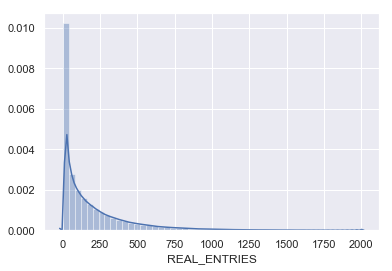

In [107]:
sns.distplot(df['REAL_ENTRIES']
             [df['REAL_ENTRIES'] < 2000]);

In [108]:
# Let's first get the daily entries by station:
stations_daily = \
    (df.groupby(['STATION','DATE',"WEEKDAY"])['REAL_ENTRIES'].sum()
                 .reset_index())  

stations_daily.head()

,STATION,DATE,WEEKDAY,REAL_ENTRIES
0,1 AV,01/01/2019,Tuesday,8376.0
1,1 AV,01/02/2019,Wednesday,18476.0
2,1 AV,01/03/2019,Thursday,19866.0
3,1 AV,01/04/2019,Friday,20389.0
4,1 AV,01/05/2019,Saturday,13930.0


In [109]:
# To discover the stations with more entries:
totalentriesperstation = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False))

totalentriesperstation.head(20)

,STATION,REAL_ENTRIES
72,34 ST-PENN STA,52385203.0
257,GRD CNTRL-42 ST,45775088.0
70,34 ST-HERALD SQ,39469275.0
79,42 ST-PORT AUTH,33092334.0
19,14 ST-UNION SQ,32605239.0
377,TIMES SQ-42 ST,32561499.0
250,FULTON ST,29506917.0
99,59 ST COLUMBUS,23168143.0
98,59 ST,20648058.0
83,47-50 STS ROCK,18005679.0


In [110]:
# To get top 15 stations by total volume (sum across all days is a reasonable way to define this):
top15_stations = \
    (stations_daily.groupby(['STATION'])['REAL_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='REAL_ENTRIES',ascending=False) 
                   .STATION.head(15))

top15_stations

72       34 ST-PENN STA
257     GRD CNTRL-42 ST
70      34 ST-HERALD SQ
79      42 ST-PORT AUTH
19       14 ST-UNION SQ
377      TIMES SQ-42 ST
250           FULTON ST
99       59 ST COLUMBUS
98                59 ST
83       47-50 STS ROCK
241       FLUSHING-MAIN
339        PATH NEW WTC
281     JKSN HT-ROOSVLT
195    CANAL ST JNQRZ6W
145      ATL AV-BARCLAY
Name: STATION, dtype: object

In [111]:
# next create a new df that filters the stations daily data down to the top 15 stations
stations_daily_top15 = \
    stations_daily[stations_daily['STATION'].isin(top15_stations)]
stations_daily_top15.sort_values(by = 'REAL_ENTRIES')

,STATION,DATE,WEEKDAY,REAL_ENTRIES
29706,47-50 STS ROCK,09/23/2018,Sunday,0.0
86527,FLUSHING-MAIN,03/31/2019,Sunday,0.0
86541,FLUSHING-MAIN,04/14/2019,Sunday,1.0
86562,FLUSHING-MAIN,05/05/2019,Sunday,2.0
29713,47-50 STS ROCK,09/30/2018,Sunday,2.0
86548,FLUSHING-MAIN,04/21/2019,Sunday,2.0
29699,47-50 STS ROCK,09/16/2018,Sunday,5.0
29629,47-50 STS ROCK,07/08/2018,Sunday,35.0
86779,FLUSHING-MAIN,12/09/2018,Sunday,641.0
86778,FLUSHING-MAIN,12/08/2018,Saturday,748.0


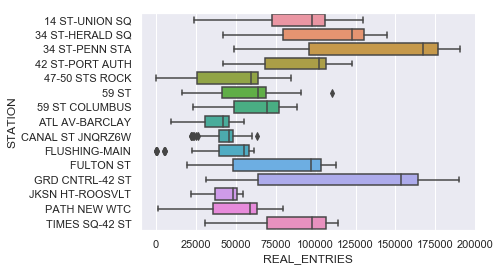

In [112]:
# use seaborn to create a boxplot by station
sns.boxplot('REAL_ENTRIES', 'STATION', data=stations_daily_top15)

In [113]:
avg_per_day = stations_daily_top15.groupby(["STATION"])["REAL_ENTRIES"].mean()
avg_per_day = avg_per_day.to_frame().reset_index()
avg_per_day

,STATION,REAL_ENTRIES
0,14 ST-UNION SQ,89574.832418
1,34 ST-HERALD SQ,108432.074176
2,34 ST-PENN STA,143915.392857
3,42 ST-PORT AUTH,90913.005495
4,47-50 STS ROCK,49466.151099
5,59 ST,56725.434066
6,59 ST COLUMBUS,63648.744505
7,ATL AV-BARCLAY,38757.604396
8,CANAL ST JNQRZ6W,43652.010989
9,FLUSHING-MAIN,48758.019231


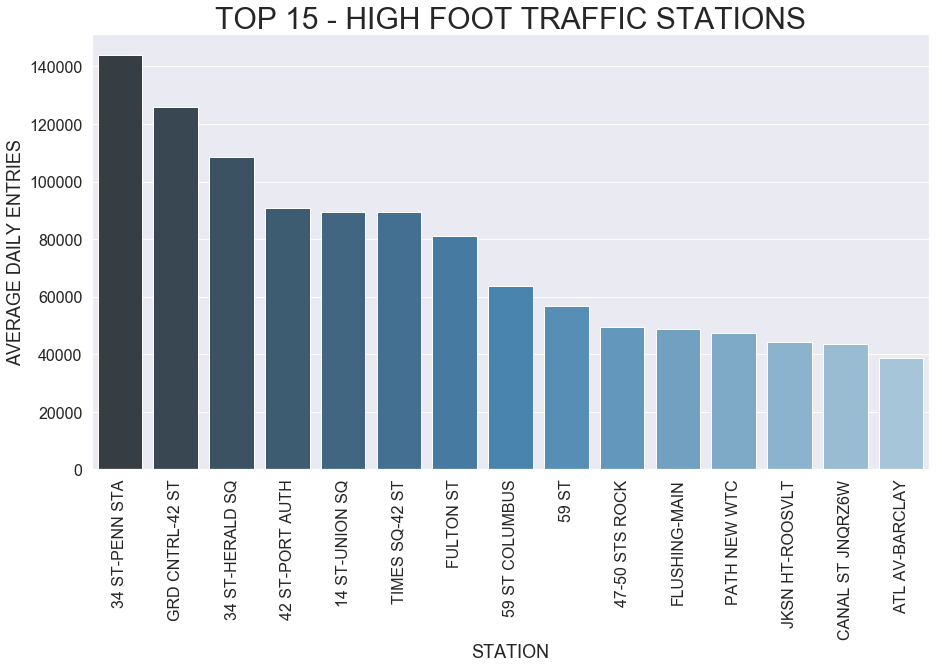

In [114]:
plt.figure(figsize=(15,8))
sns.barplot('STATION', 'REAL_ENTRIES', data=avg_per_day.sort_values(['REAL_ENTRIES'], ascending=False), palette ="Blues_d");

plt.xticks(rotation = 'vertical');
plt.ylabel("AVERAGE DAILY ENTRIES", fontsize=18);
plt.xlabel("STATION", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("TOP 15 - HIGH FOOT TRAFFIC STATIONS", fontsize=30);
plt.savefig("plot1.svg", bbox_inches='tight')
plt.savefig("plot1.png", bbox_inches='tight')

In [115]:
stations_daily.head()

,STATION,DATE,WEEKDAY,REAL_ENTRIES
0,1 AV,01/01/2019,Tuesday,8376.0
1,1 AV,01/02/2019,Wednesday,18476.0
2,1 AV,01/03/2019,Thursday,19866.0
3,1 AV,01/04/2019,Friday,20389.0
4,1 AV,01/05/2019,Saturday,13930.0


In [124]:
# Now let's try to find more patterns:

entries_by_weekday = stations_daily.groupby(['STATION',"WEEKDAY"])['REAL_ENTRIES'].mean()
entries_by_weekday.head()

STATION  WEEKDAY 
1 AV     Friday      20424.538462
         Monday      16761.653846
         Saturday    10423.096154
         Sunday       8008.673077
         Thursday    20090.365385
Name: REAL_ENTRIES, dtype: float64

In [125]:
entries_by_weekday = entries_by_weekday.unstack(level = -1).reset_index()
entries_by_weekday.head()

WEEKDAY,STATION,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1 AV,20424.538462,16761.653846,10423.096154,8008.673077,20090.365385,18856.711538,19862.423077
1,103 ST,30328.269231,27785.346154,18651.980769,14939.538462,31048.019231,30107.730769,30913.653846
2,103 ST-CORONA,20057.461538,18659.019231,13695.538462,10469.576923,19829.461538,19263.961538,19938.250000
3,104 ST,3983.442308,3705.519231,1436.403846,996.423077,4133.615385,4061.903846,4152.480769
4,110 ST,10773.725490,9703.903846,6960.192308,5030.038462,10676.057692,10340.730769,10766.346154


In [126]:
entries_weekday_top15 = \
    entries_by_weekday[entries_by_weekday['STATION'].isin(top15_stations)]
entries_weekday_top15

WEEKDAY,STATION,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
19,14 ST-UNION SQ,103783.653846,88912.519231,72716.019231,55252.384615,103297.711538,98516.096154,104545.442308
70,34 ST-HERALD SQ,127788.538462,114465.692308,75378.903846,60975.653846,128618.576923,123734.173077,128062.980769
72,34 ST-PENN STA,163349.980769,159273.442308,91519.769231,79747.442308,173647.711538,169041.307692,170828.096154
79,42 ST-PORT AUTH,102719.403846,97306.846154,67316.826923,58024.461538,105182.615385,101798.403846,104042.480769
83,47-50 STS ROCK,61461.038462,54740.615385,23267.307692,17599.019231,64046.961538,61488.903846,63659.211538
98,59 ST,64770.288462,59176.365385,42769.730769,30342.230769,67054.557692,65616.634615,67348.230769
99,59 ST COLUMBUS,71413.500000,64964.865385,46406.096154,38775.000000,75964.153846,72325.096154,75692.500000
145,ATL AV-BARCLAY,44463.788462,40750.480769,29485.192308,25351.461538,44256.384615,42514.826923,44481.096154
195,CANAL ST JNQRZ6W,48711.307692,43285.461538,41099.500000,33538.826923,46965.980769,45513.769231,46449.230769
241,FLUSHING-MAIN,55980.653846,53255.153846,35158.750000,28049.788462,56538.769231,55351.519231,56971.500000


In [127]:
entries_weekday_top15 = entries_weekday_top15.groupby(entries_weekday_top15["STATION"]).mean()
entries_weekday_top15

WEEKDAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STATION,,,,,,,
14 ST-UNION SQ,103783.653846,88912.519231,72716.019231,55252.384615,103297.711538,98516.096154,104545.442308
34 ST-HERALD SQ,127788.538462,114465.692308,75378.903846,60975.653846,128618.576923,123734.173077,128062.980769
34 ST-PENN STA,163349.980769,159273.442308,91519.769231,79747.442308,173647.711538,169041.307692,170828.096154
42 ST-PORT AUTH,102719.403846,97306.846154,67316.826923,58024.461538,105182.615385,101798.403846,104042.480769
47-50 STS ROCK,61461.038462,54740.615385,23267.307692,17599.019231,64046.961538,61488.903846,63659.211538
59 ST,64770.288462,59176.365385,42769.730769,30342.230769,67054.557692,65616.634615,67348.230769
59 ST COLUMBUS,71413.500000,64964.865385,46406.096154,38775.000000,75964.153846,72325.096154,75692.500000
ATL AV-BARCLAY,44463.788462,40750.480769,29485.192308,25351.461538,44256.384615,42514.826923,44481.096154
CANAL ST JNQRZ6W,48711.307692,43285.461538,41099.500000,33538.826923,46965.980769,45513.769231,46449.230769


In [128]:
cols = entries_weekday_top15.columns.tolist()
cols

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [129]:
cols = cols[1] + " " + cols[5] + " " + cols[6] + " " + cols[4] + " " + cols[0]+ " " + cols[2] + " " + cols[3]

In [130]:
cols = cols.split()
cols

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [131]:
avg_weekday_top15 = entries_weekday_top15[cols]
avg_weekday_top15.head()

WEEKDAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
14 ST-UNION SQ,88912.519231,98516.096154,104545.442308,103297.711538,103783.653846,72716.019231,55252.384615
34 ST-HERALD SQ,114465.692308,123734.173077,128062.980769,128618.576923,127788.538462,75378.903846,60975.653846
34 ST-PENN STA,159273.442308,169041.307692,170828.096154,173647.711538,163349.980769,91519.769231,79747.442308
42 ST-PORT AUTH,97306.846154,101798.403846,104042.480769,105182.615385,102719.403846,67316.826923,58024.461538
47-50 STS ROCK,54740.615385,61488.903846,63659.211538,64046.961538,61461.038462,23267.307692,17599.019231


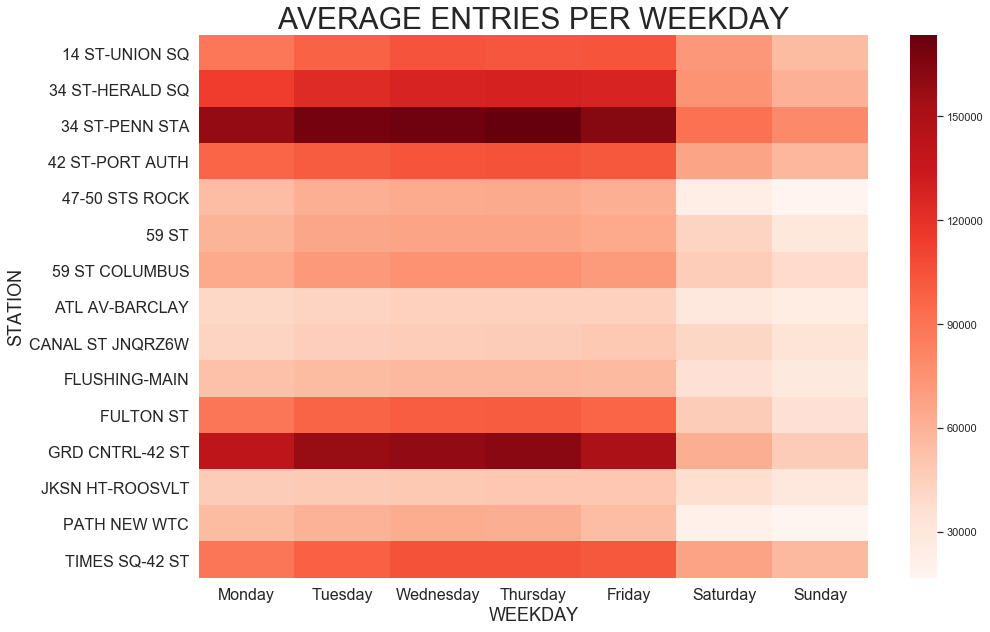

In [132]:
plt.figure(figsize = (15,10))
sns.heatmap(avg_weekday_top15,annot=False, cmap="Reds");
plt.xlabel("WEEKDAY", fontsize=18);
plt.ylabel("STATION", fontsize=18);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("AVERAGE ENTRIES PER WEEKDAY", fontsize=30)
plt.savefig("plot2.svg", bbox_inches='tight')
plt.savefig("plot2.png", bbox_inches='tight')
# plt.xticks(ticks=[0,1,2,3,4,5,6], labels=[0,1,2,3,4,5,6]);


In [159]:
top_15_stations = df[df['STATION'].isin(top15_stations)]

In [161]:
total_by_session = top_15_stations.groupby(["STATION", "SESSION", "DATE"])["REAL_ENTRIES"].sum()
total_by_session.head()

STATION         SESSION  DATE      
14 ST-UNION SQ  Dawn     01/01/2019     4857.0
                         01/02/2019     8206.0
                         01/03/2019    15473.0
                         01/04/2019    17900.0
                         01/05/2019    21266.0
Name: REAL_ENTRIES, dtype: float64

In [165]:
total_by_session = total_by_session.to_frame()
total_by_session.head()

REAL_ENTRIES
STATION        SESSION DATE                    
14 ST-UNION SQ Dawn    01/01/2019        4857.0
                       01/02/2019        8206.0
                       01/03/2019       15473.0
                       01/04/2019       17900.0
                       01/05/2019       21266.0

In [166]:
avg_by_session = total_by_session.groupby(['STATION',"SESSION"])['REAL_ENTRIES'].mean()
avg_by_session.head()

STATION          SESSION  
14 ST-UNION SQ   Dawn         15569.769231
                 Morning       5329.903846
                 Afternoon    35485.678571
                 Evening      33189.480769
34 ST-HERALD SQ  Dawn         14512.647383
Name: REAL_ENTRIES, dtype: float64

In [167]:
avg_by_session = avg_by_session.unstack(level = -1)
avg_by_session

SESSION,Dawn,Morning,Afternoon,Evening
STATION,,,,
14 ST-UNION SQ,15569.769231,5329.903846,35485.678571,33189.480769
34 ST-HERALD SQ,14512.647383,10984.554945,32710.752747,50263.989011
34 ST-PENN STA,13429.005495,35877.950549,46518.373626,48090.063187
42 ST-PORT AUTH,11079.126374,22655.417582,28522.914835,28655.546703
47-50 STS ROCK,5471.209366,1238.901099,10875.060440,31896.010989
59 ST,6360.250689,6286.739011,18367.876374,25728.041209
59 ST COLUMBUS,8755.674931,4463.203297,20936.425824,29517.494505
ATL AV-BARCLAY,4597.754821,7104.692308,13992.464286,13075.324176
CANAL ST JNQRZ6W,5723.467033,1561.538462,18633.263736,17733.741758


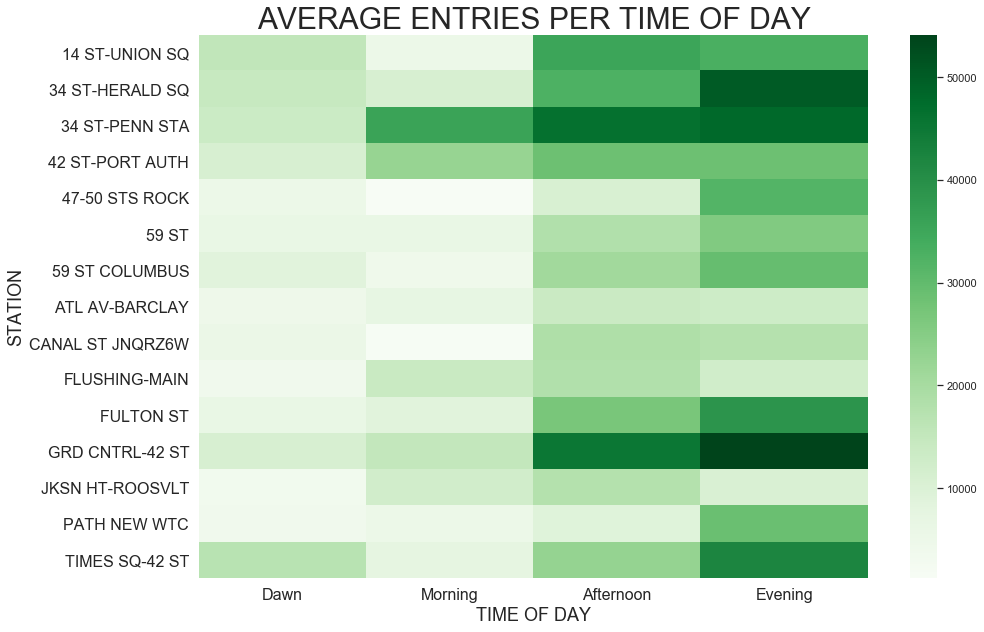

In [168]:
plt.figure(figsize = (15,10))
sns.heatmap(avg_by_session,annot=False, cmap="Greens");
plt.xlabel("TIME OF DAY", fontsize=18);
plt.ylabel("STATION", fontsize=18);
plt.title("AVERAGE ENTRIES PER TIME OF DAY", fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("plot3.svg", bbox_inches='tight')
plt.savefig("plot3.png", bbox_inches='tight')

In [169]:
daily_entries_15 = top_15_stations.groupby(["STATION", "DATE_TIME"])["REAL_ENTRIES"].sum()
daily_entries_15

STATION         DATE_TIME          
14 ST-UNION SQ  2018-06-30 01:00:00        3.0
                2018-06-30 05:00:00     2497.0
                2018-06-30 09:00:00     2145.0
                2018-06-30 13:00:00    10264.0
                2018-06-30 17:00:00    18345.0
                2018-06-30 21:00:00    17894.0
                2018-07-01 01:00:00    11274.0
                2018-07-01 05:00:00     2137.0
                2018-07-01 09:00:00     1468.0
                2018-07-01 13:00:00     5991.0
                2018-07-01 17:00:00    13305.0
                2018-07-01 21:00:00    14383.0
                2018-07-02 01:00:00     7677.0
                2018-07-02 05:00:00      750.0
                2018-07-02 09:00:00     8030.0
                2018-07-02 13:00:00    12140.0
                2018-07-02 17:00:00    22952.0
                2018-07-02 21:00:00    35345.0
                2018-07-03 01:00:00    11548.0
                2018-07-03 05:00:00      900.0
                2018-07-

In [170]:
daily_entries_15 = daily_entries_15.to_frame().reset_index()

In [171]:
daily_entries_15['DATE'] = daily_entries_15['DATE_TIME'].dt.date

In [172]:
daily_entries_15.head()

,STATION,DATE_TIME,REAL_ENTRIES,DATE
0,14 ST-UNION SQ,2018-06-30 01:00:00,3.0,2018-06-30
1,14 ST-UNION SQ,2018-06-30 05:00:00,2497.0,2018-06-30
2,14 ST-UNION SQ,2018-06-30 09:00:00,2145.0,2018-06-30
3,14 ST-UNION SQ,2018-06-30 13:00:00,10264.0,2018-06-30
4,14 ST-UNION SQ,2018-06-30 17:00:00,18345.0,2018-06-30


In [173]:
daily_entries_15 = daily_entries_15.groupby(["STATION", "DATE"])["REAL_ENTRIES"].sum()

In [174]:
daily_entries_15 = daily_entries_15.to_frame().reset_index()
daily_entries_15.head()

,STATION,DATE,REAL_ENTRIES
0,14 ST-UNION SQ,2018-06-30,51148.0
1,14 ST-UNION SQ,2018-07-01,48558.0
2,14 ST-UNION SQ,2018-07-02,86894.0
3,14 ST-UNION SQ,2018-07-03,92970.0
4,14 ST-UNION SQ,2018-07-04,49240.0


In [175]:
daily_entries_15["DATE"] = pd.to_datetime(daily_entries_15["DATE"]) 
daily_entries_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 3 columns):
STATION         5460 non-null object
DATE            5460 non-null datetime64[ns]
REAL_ENTRIES    5460 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 128.0+ KB


In [176]:
daily_entries_15["MONTH"] = daily_entries_15["DATE"].dt.month
daily_entries_15.head()

,STATION,DATE,REAL_ENTRIES,MONTH
0,14 ST-UNION SQ,2018-06-30,51148.0,6
1,14 ST-UNION SQ,2018-07-01,48558.0,7
2,14 ST-UNION SQ,2018-07-02,86894.0,7
3,14 ST-UNION SQ,2018-07-03,92970.0,7
4,14 ST-UNION SQ,2018-07-04,49240.0,7


In [177]:
daily_entries_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 4 columns):
STATION         5460 non-null object
DATE            5460 non-null datetime64[ns]
REAL_ENTRIES    5460 non-null float64
MONTH           5460 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 170.7+ KB


In [178]:
daily_entries_15["SEASON"] = "NS"

# Let's create a new dataframe with only the problematic stations and remove them from the original df.
summer = ((daily_entries_15["MONTH"] == 6) |
(daily_entries_15["MONTH"] == 7) | 
(daily_entries_15["MONTH"] == 8))

daily_entries_15.loc[summer,"SEASON"] = "Summer"

In [179]:
winter = ((daily_entries_15["MONTH"] == 12) |
(daily_entries_15["MONTH"] == 1) | 
(daily_entries_15["MONTH"] == 2))

daily_entries_15.loc[winter,"SEASON"] = "Winter"

fall = ((daily_entries_15["MONTH"] == 9) |
(daily_entries_15["MONTH"] == 10) | 
(daily_entries_15["MONTH"] == 11))

daily_entries_15.loc[fall,"SEASON"] = "Fall"

spring = ((daily_entries_15["MONTH"] == 3) |
(daily_entries_15["MONTH"] == 4) | 
(daily_entries_15["MONTH"] == 5))

daily_entries_15.loc[spring,"SEASON"] = "Spring"

In [180]:
daily_entries_15

,STATION,DATE,REAL_ENTRIES,MONTH,SEASON
0,14 ST-UNION SQ,2018-06-30,51148.0,6,Summer
1,14 ST-UNION SQ,2018-07-01,48558.0,7,Summer
2,14 ST-UNION SQ,2018-07-02,86894.0,7,Summer
3,14 ST-UNION SQ,2018-07-03,92970.0,7,Summer
4,14 ST-UNION SQ,2018-07-04,49240.0,7,Summer
5,14 ST-UNION SQ,2018-07-05,84725.0,7,Summer
6,14 ST-UNION SQ,2018-07-06,86720.0,7,Summer
7,14 ST-UNION SQ,2018-07-07,69925.0,7,Summer
8,14 ST-UNION SQ,2018-07-08,56501.0,7,Summer
9,14 ST-UNION SQ,2018-07-09,95411.0,7,Summer


In [181]:
avg_entries_day = daily_entries_15.groupby("DATE")["REAL_ENTRIES"].mean()
avg_entries_day = avg_entries_day.to_frame().reset_index()
avg_entries_day.head(3)

,DATE,REAL_ENTRIES
0,2018-06-30,43788.800000
1,2018-07-01,39173.266667
2,2018-07-02,80041.866667


In [182]:
avg_entries_day["COLUMN"] = "1"

In [183]:
seasonal = avg_entries_day.set_index('DATE').groupby('COLUMN')['REAL_ENTRIES'].rolling(30).mean()
seasonal = seasonal.to_frame().reset_index()
seasonal.drop(["COLUMN"],axis=1,inplace=True)
seasonal.dropna(axis=0, inplace=True)

In [184]:
seasonal.head()

,DATE,REAL_ENTRIES
29,2018-07-29,71160.480000
30,2018-07-30,72515.571111
31,2018-07-31,74169.526667
32,2018-08-01,74492.777778
33,2018-08-02,74777.237778


/Users/liviasalgueiro/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


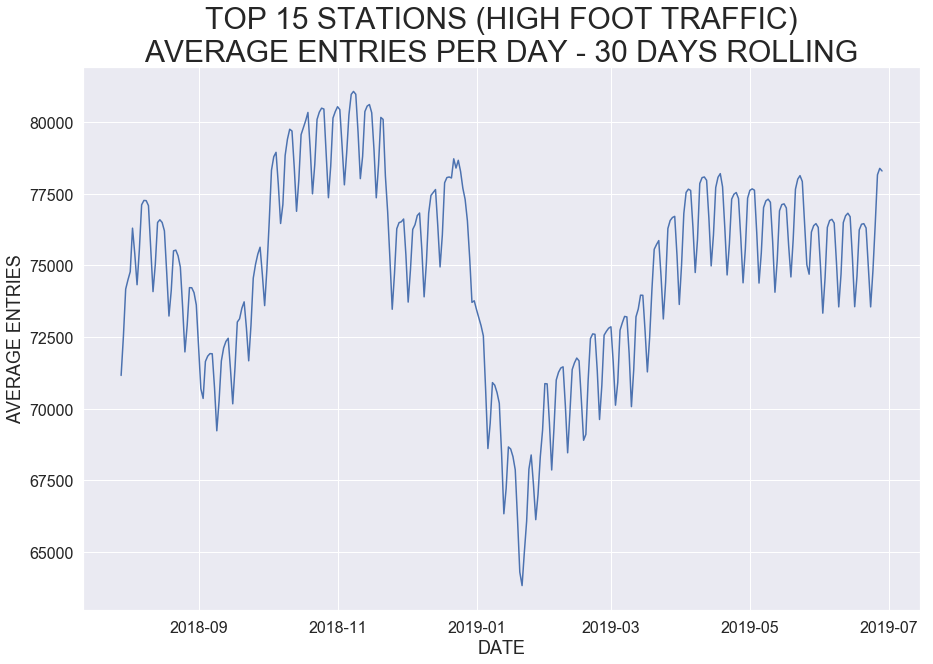

In [186]:
plt.figure(figsize = (15,10))
plt.plot(seasonal['DATE'],seasonal['REAL_ENTRIES'])
plt.xlabel("DATE", fontsize=18);
plt.ylabel("AVERAGE ENTRIES", fontsize=18);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("TOP 15 STATIONS (HIGH FOOT TRAFFIC)\nAVERAGE ENTRIES PER DAY - 30 DAYS ROLLING", fontsize=30)
plt.savefig("plot4.svg", bbox_inches='tight')
plt.savefig("plot4.png", bbox_inches='tight')


In [187]:
entries_per_month = daily_entries_15.groupby(["STATION", "MONTH"])["REAL_ENTRIES"].mean()
entries_per_month = entries_per_month.to_frame()
entries_per_month = entries_per_month.unstack(-1)
entries_per_month.head()

REAL_ENTRIES                                               \
MONTH                       1              2              3              4    
STATION                                                                       
14 ST-UNION SQ    82480.258065   87172.892857   90251.000000   93788.066667   
34 ST-HERALD SQ  101207.903226  102438.464286  107359.967742  111040.433333   
34 ST-PENN STA   136230.709677  140267.535714  144764.129032  149962.200000   
42 ST-PORT AUTH   86048.193548   88135.678571   91171.193548   94945.733333   
47-50 STS ROCK    47609.677419   46935.285714   48355.580645   50159.900000   

                                                                             \
MONTH                       5              6              7              8    
STATION                                                                       
14 ST-UNION SQ    92515.548387   89014.551724   86548.548387   86928.225806   
34 ST-HERALD SQ  110645.225806  111175.310345  104659.419355  108408.032258   
34 ST-PENN STA   148585.967742  147875.655172  138388.709677  138654.096774   
42 ST-PORT AUTH   94428.677419   94007.172414   89538.096774   89978.870968   
47-50 STS ROCK    51571.419355   50824.689655   44855.032258   47382.806452   

                                                                             
MONTH                       9              10             11             12  
STATION                                                                      
14 ST-UNION SQ    90816.200000   96065.645161   90761.433333   88501.258065  
34 ST-HERALD SQ  101958.333333  115629.064516  114781.800000  111558.032258  
34 ST-PENN STA   138684.933333  155033.483871  149221.733333  139415.548387  
42 ST-PORT AUTH   89423.066667   95424.548387   91312.933333   86567.677419  
47-50 STS ROCK    38871.100000   51428.387097   53257.933333   61987.645161

In [188]:
entries_per_month = entries_per_month.transpose()

In [189]:
entries_per_month = (100. * entries_per_month / entries_per_month.sum())

In [190]:
entries_per_month = entries_per_month.transpose()
entries_per_month

REAL_ENTRIES                                          \
MONTH                      1         2         3         4         5    
STATION                                                                 
14 ST-UNION SQ       7.673698  8.110286  8.396663  8.725741  8.607350   
34 ST-HERALD SQ      7.780065  7.874660  8.252987  8.535912  8.505531   
34 ST-PENN STA       7.887900  8.121636  8.381994  8.682967  8.603282   
42 ST-PORT AUTH      7.887225  8.078565  8.356802  8.702779  8.655385   
47-50 STS ROCK       8.025373  7.911693  8.151107  8.455254  8.693188   
59 ST                7.922729  8.017384  8.127027  8.574757  8.477633   
59 ST COLUMBUS       7.487750  8.219663  8.420814  8.864948  8.635760   
ATL AV-BARCLAY       8.021993  8.271029  8.583380  8.705129  8.612554   
CANAL ST JNQRZ6W     7.324154  8.023744  8.242100  8.642370  8.425339   
FLUSHING-MAIN        7.905549  8.228544  8.172771  7.924609  8.484390   
FULTON ST            7.463689  7.915770  8.128111  8.662980  8.692723   
GRD CNTRL-42 ST      7.980425  8.167336  8.353276  8.780228  8.569121   
JKSN HT-ROOSVLT      7.867866  8.087366  8.318552  8.567130  8.777841   
PATH NEW WTC         7.503969  7.598522  7.416658  8.096892  8.016864   
TIMES SQ-42 ST       7.454614  7.783917  8.155146  8.736740  8.522183   

                                                                               \
MONTH                   6         7         8         9          10        11   
STATION                                                                         
14 ST-UNION SQ    8.281628  8.052199  8.087523  8.449248   8.937639  8.444152   
34 ST-HERALD SQ   8.546280  8.045390  8.333554  7.837752   8.888650  8.823519   
34 ST-PENN STA    8.562154  8.012850  8.028216  8.030002   8.976600  8.640094   
42 ST-PORT AUTH   8.616749  8.207112  8.247513  8.196568   8.746667  8.369794   
47-50 STS ROCK    8.567314  7.561033  7.987130  6.552346   8.669077  8.977477   
59 ST             8.403604  8.061667  8.125032  8.167866   9.177239  8.594171   
59 ST COLUMBUS    8.216272  7.688022  7.716052  8.364748   9.296876  8.912575   
ATL AV-BARCLAY    8.443209  7.486536  7.640840  7.850211   9.069060  8.909299   
CANAL ST JNQRZ6W  8.725966  8.491065  8.524997  9.253453   8.498940  7.815746   
FLUSHING-MAIN     8.716311  8.246340  8.385381  8.509382   9.020261  8.575076   
FULTON ST         8.540800  8.457293  8.654160  8.437770   9.194888  8.216998   
GRD CNTRL-42 ST   8.476158  8.233432  8.225284  8.089571   8.812705  8.490019   
JKSN HT-ROOSVLT   8.645004  8.142404  8.271082  8.139484   8.794852  8.479097   
PATH NEW WTC      8.196863  8.751928  9.429155  9.174725  10.056092  8.287396   
TIMES SQ-42 ST    8.546903  8.474948  8.515372  8.419698   8.828946  8.438458   

                             
MONTH                    12  
STATION                      
14 ST-UNION SQ     8.233873  
34 ST-HERALD SQ    8.575701  
34 ST-PENN STA     8.072305  
42 ST-PORT AUTH    7.934841  
47-50 STS ROCK    10.449009  
59 ST              8.350890  
59 ST COLUMBUS     8.176520  
ATL AV-BARCLAY     8.406759  
CANAL ST JNQRZ6W   8.032126  
FLUSHING-MAIN      7.831385  
FULTON ST          7.634818  
GRD CNTRL-42 ST    7.822444  
JKSN HT-ROOSVLT    7.909325  
PATH NEW WTC       7.470936  
TIMES SQ-42 ST     8.123076

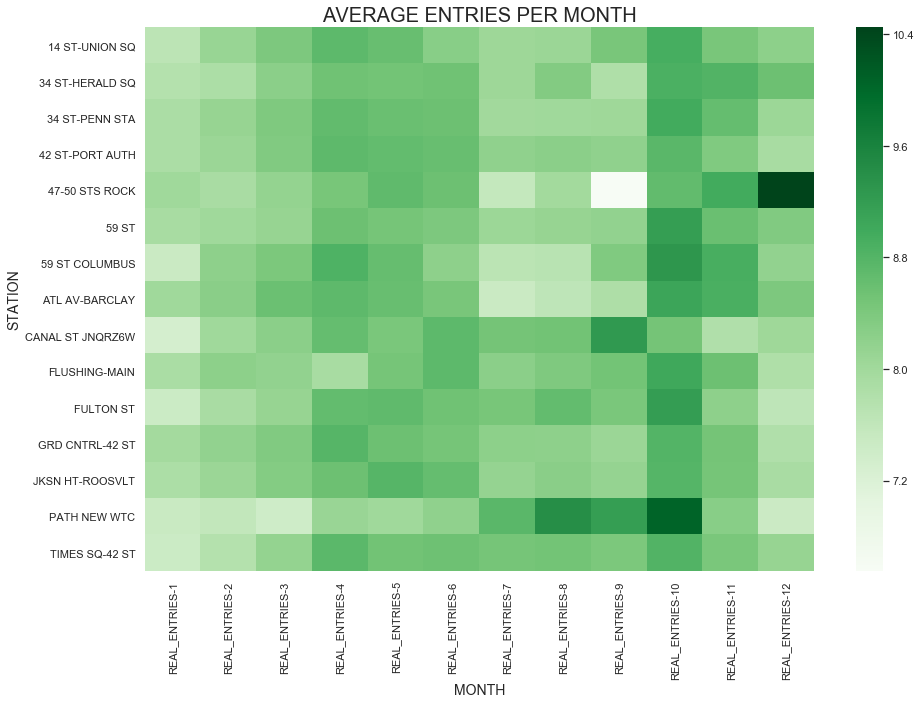

In [191]:
plt.figure(figsize = (15,10))
sns.heatmap(entries_per_month,annot=False, cmap="Greens");
plt.xlabel("MONTH", fontsize=14);
plt.ylabel("STATION", fontsize=14);
plt.title("AVERAGE ENTRIES PER MONTH", fontsize=20)
plt.savefig("plot5.svg")
plt.savefig("plot5.png")

In [192]:
entries_per_season = daily_entries_15.groupby(["STATION", "SEASON"])["REAL_ENTRIES"].mean()
entries_per_season = entries_per_season.to_frame()
entries_per_season = entries_per_season.unstack(-1)
entries_per_season.head()

REAL_ENTRIES                                             
SEASON                    Fall         Spring         Summer         Winter
STATION                                                                    
14 ST-UNION SQ    92586.417582   92167.445652   87463.758242   86014.088889
34 ST-HERALD SQ  110842.912088  109667.108696  108012.912088  105155.788889
34 ST-PENN STA   147727.890110  147746.945652  141502.428571  138583.611111
42 ST-PORT AUTH   92090.560440   93499.652174   91112.461538   86876.566667
47-50 STS ROCK    47891.769231   50027.543478   47618.560440   52352.277778

In [193]:
entries_per_season = entries_per_season.transpose()

In [194]:
entries_per_season = (100. * entries_per_season / entries_per_season.sum())

In [195]:
entries_per_season = entries_per_season.transpose()


In [196]:
# entries_per_season[()'REAL_ENTRIES', 'Winter'), ('REAL_ENTRIES', 'Spring'), ('REAL_ENTRIES', 'Summer'), ('REAL_ENTRIES', 'Fall')]
entries_per_season = entries_per_season['REAL_ENTRIES'][["Winter", 'Spring', 'Summer', 'Fall']]

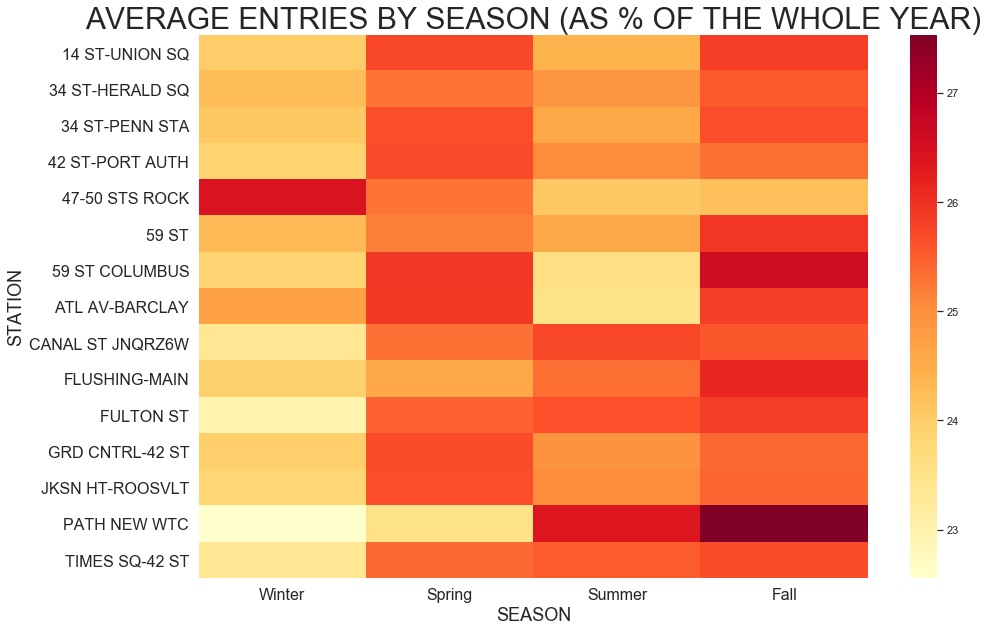

In [197]:
plt.figure(figsize = (15,10))
sns.heatmap(entries_per_season,annot=False, cmap="YlOrRd");
plt.xlabel("SEASON", fontsize=18);
plt.ylabel("STATION", fontsize=18);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("AVERAGE ENTRIES BY SEASON (AS % OF THE WHOLE YEAR)", fontsize=30)
plt.savefig("plot6.svg", bbox_inches='tight')
plt.savefig("plot6.png", bbox_inches='tight')
# plt.xticks(ticks=[0,1,2,3,4,5,6], labels=[0,1,2,3,4,5,6]);
